# Preprocessing & EDA
<hr>

<p>Our baseline score has been established at 69%, which will be a benchmark for us to make comparison to other models.</p>

<p>Method such as stopwords, stemming and lemmatization was used to filter out less meaningful words. </p>

<p>Train test split method was used for validation and training purposes for out models.</p>

<p>Through CountVectorizer and TFIDF Vectorizer function, we text the datas to matrix of word count for both subreddit SucideWatch and Domestic Violence to assist in our findings below: </p>


<p>CVEC - both subreddit have "Like" as the most frequently used word. Perhaps due to the nature of these 2 subreddit being of sensitive topics whereby people could be consoling each other, people talking about their past negative experience. And if we look closely at the titles for these 2 subreddits, we will find such as "it makes me feel like...", "it just feels like...." therefore concluding the possiblity that it will appear so often in both subreddit.<br>

TFIDF Vectorizer weighted "want" higher than "like" compared to Count Vectorizer, when "like" appeared more times than "want" in suicide posts. Because TF-IDF "penalises" words that appearing too often. These words might be a good indicator to build models that might be able to predict and identify sucidal prone individual, which will likely to be able to answer our problem statement.

<hr>

### Load Library

In [4]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
import re
from bs4 import BeautifulSoup
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
import nltk
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [5]:
# Read in merged csv
df = pd.read_csv('data/data_modelling.csv')

In [6]:
df.shape

(1349, 3)

In [7]:
# Dropping Unnamed column
df.drop('Unnamed: 0', axis=1, inplace = True)

In [8]:
df.to_csv('data/data_modelling.csv')

In [9]:
# Double checking on columns to ensure 'Unamed Column' is dropped. 
df.head()

,selftext,target
0,Domestic Violence - how to navigate this when ...,1
1,"Please give me advice, I honestly don't know t...",1
2,"I Finally Escaped, AgainI feel stupid for goin...",1
3,When the man who mentally and physically abuse...,1
4,"I feel bad for dobbing him in...Hi all,\n\nSo ...",1


### Train Test Split

In [10]:
# defining X as predictor variable and y as target
X = df.selftext
y = df.target

In [11]:
X_train_not_optimized, X_test_not_optimized, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

### Baseline Model

In [12]:
y_train.value_counts(normalize = True)

0    0.69634
1    0.30366
Name: target, dtype: float64

**Baseline accuracy at 69%**, a benchmark for us to make comparison for other models.</h4>
<hr>

### Tokenizing, Stemming and Lemmatizing

In [13]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [14]:
def review_to_words(raw_review):
    # 1. Remove HTML.
    review_text = BeautifulSoup(raw_review).get_text()

    # 2. Remove non-letters.
    letters_only = re.sub("[^a-zA-Z]", " ", review_text)

    # 3. Convert to lower case, split into individual words.
    words = letters_only.lower().split()

    # 4. In Python, searching a set is much faster than searching
    # a list, so convert the stop words to a set.
    stops = set(stopwords.words('english'))

    # 5. Remove stop words.
    meaningful_words = [w for w in words if not w in stops]

    lemmatizer = WordNetLemmatizer()
    lem_words = [lemmatizer.lemmatize(w) for w in meaningful_words]

    # 6. Join the words back into one string separated by space,
    # and return the result.
    return(" ".join(meaningful_words))

In [15]:
# Apply Lemmatizer
df['selftext'] = df['selftext'].apply(review_to_words)

In [16]:
# Showing "Not optimized X_train data" for comparison to "optimzed X_train data" shown below
print(pd.DataFrame(X_train_not_optimized).shape)
pd.DataFrame(X_train_not_optimized).head()

(1011, 1)


,selftext
587,"Expecting first child 3 months ago, now left w..."
1063,"I fear that I have a low IQ, and its caused me..."
996,AddictionMy addiction is very embarrassing to ...
204,Finally seeing the abuse as they really were.I...
961,I don't want you to die.... I mean... I can't ...


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [18]:
# Showing Optimized X_train data.
print((pd.DataFrame(X_train, columns=['selftext']).shape))
pd.DataFrame(X_train,columns=['selftext']).head()

(1011, 1)


,selftext
587,expecting first child months ago left nothing ...
1063,fear low iq caused attempt multiple times know...
996,addictionmy addiction embarrassing talk may ha...
204,finally seeing abuse really relationship one w...
961,want die mean stop


# EDA

### Count Vectorization

In [19]:
#CVEC for Domestic Violence
vectorizer = CountVectorizer(analyzer = "word", 
                             tokenizer = None, 
                             preprocessor = None,
                             stop_words = "english", 
                             max_features = 5000) 

# input for CountVectorizer is an array of strings
domesticviolence_vector_input = df[df['target'] == 0]['selftext']

# fit_transform the vectorizer
dom_words = vectorizer.fit_transform(domesticviolence_vector_input)

# convert output to a Numpy array
dom_words = dom_words.toarray()

In [20]:
dom_word_list = vectorizer.get_feature_names()
print(dom_word_list)

['abandoned', 'abandonment', 'ability', 'able', 'abomination', 'abroad', 'absent', 'absolute', 'absolutely', 'absorbed', 'abstract', 'absurdism', 'abuse', 'abused', 'abuses', 'abusing', 'abusive', 'abyss', 'academic', 'acc', 'accept', 'acceptable', 'accepted', 'accepting', 'access', 'accident', 'accidentally', 'accomplish', 'accomplished', 'accomplishing', 'according', 'account', 'accounts', 'accurate', 'acetaminophen', 'aches', 'achieve', 'achieved', 'achievements', 'aching', 'acknowledge', 'acknowledged', 'act', 'acted', 'acting', 'action', 'actions', 'active', 'actively', 'activity', 'acts', 'actual', 'actually', 'adapt', 'add', 'addict', 'addicted', 'addiction', 'adding', 'additional', 'address', 'adhd', 'adjusted', 'admit', 'admitted', 'adolescence', 'adopted', 'adult', 'adults', 'advance', 'advantage', 'advice', 'af', 'affairs', 'affect', 'affected', 'affects', 'afford', 'afraid', 'afterlife', 'againi', 'age', 'ages', 'aggression', 'aggressive', 'aggressively', 'ago', 'agony', 'a

In [21]:
#Converting to a 'list'
dom_words = list(df.selftext[(df.target ==0)])

In [22]:
dcvec = CountVectorizer(analyzer='word', max_features=5000)
dom_cv = dcvec.fit_transform(dom_words)

In [23]:
dom_words = pd.DataFrame(dom_cv.todense(), columns=dcvec.get_feature_names())

In [24]:
dom_coef = dom_words.mean().sort_values(ascending=False)[:10]

In [26]:
#Display Domestic Violence dataset
print(f"Domestic Violence dataset total row and column: {dom_words.shape}")
dom_words.head()

Domestic Violence dataset total row and column: (939, 5000)


,abandoned,abandonment,ability,able,abomination,abroad,absent,absolute,absolutely,absorbed,...,yourselftake,youth,youtube,youve,yr,yrs,zack,zero,zimbabwe,zone
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
#CVEC Suicide Watch: Get most frequently used words, can change max_features
vectorizer = CountVectorizer(analyzer = "word", 
                             tokenizer = None, 
                             preprocessor = None,
                             stop_words = "english", 
                             max_features = 5000) 

# input for CountVectorizer is an array of strings
suicide_vector_input = df[df['target'] == 1]['selftext']

# fit_transform the vectorizer
suicide_words = vectorizer.fit_transform(suicide_vector_input)

# convert output to a Numpy array
suicide_words = suicide_words.toarray()

In [28]:
suicide_word_list = vectorizer.get_feature_names()
print(suicide_word_list)

['ab', 'aba', 'abandoned', 'abandoning', 'abandonment', 'abdomen', 'abide', 'ability', 'able', 'abnormal', 'abolition', 'abolitionist', 'abortion', 'abortions', 'absent', 'absolute', 'absolutely', 'abt', 'abuse', 'abusecome', 'abused', 'abusedhi', 'abusedi', 'abusedthe', 'abusei', 'abuser', 'abuserhello', 'abuserit', 'abuserme', 'abusers', 'abuses', 'abusing', 'abusive', 'abusively', 'ac', 'academy', 'acc', 'accept', 'acceptable', 'accepted', 'accepting', 'accepts', 'access', 'accessible', 'accident', 'accidentally', 'accidently', 'accidents', 'accommodations', 'accompanied', 'according', 'account', 'accountability', 'accountable', 'accounts', 'acct', 'accumulating', 'accusations', 'accuse', 'accused', 'accuses', 'accusing', 'accustomed', 'achieve', 'achieved', 'achievements', 'acid', 'acknowledge', 'acknowledged', 'acoustic', 'act', 'acted', 'acting', 'action', 'actions', 'active', 'actively', 'activities', 'activity', 'acts', 'actual', 'actually', 'add', 'added', 'addict', 'addicted'

In [29]:
suicide_words = list(df.selftext[(df.target ==1)])

In [30]:
scvec = CountVectorizer(analyzer='word', max_features=5000)
suicide_cv = scvec.fit_transform(suicide_words)

In [31]:
suicide_words = pd.DataFrame(suicide_cv.todense(), columns=scvec.get_feature_names())

In [32]:
suicide_coef = suicide_words.mean().sort_values(ascending=False)[:10]

In [33]:
print(f"Domestic Violence dataset total row and column: {suicide_words.shape}")
suicide_words.head()

Domestic Violence dataset total row and column: (410, 5000)


,ab,aba,abandoned,abandoning,abandonment,abdomen,abide,ability,able,abnormal,...,youtube,yr,yrds,yrs,yt,yvibehuvns,zero,zoloft,zone,zoom
0,0,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
# Function to find the common words on each subreddits
def common_words(a, b):
    a_set = set(a)
    b_set = set(b)
    if (a_set & b_set):
        print(a_set & b_set)
    else:
        print("No common elements")

In [37]:
# Creating a list containing common words on both subreddits
union_words = [common_words(suicide_word_list, dom_word_list)]

{'comfort', 'tantrums', 'screen', 'lawyer', 'somebody', 'ring', 'fall', 'tracks', 'brief', 'roof', 'washing', 'chores', 'psychosis', 'suppress', 'bet', 'carrying', 'obsessed', 'helpi', 'desire', 'contributing', 'minute', 'bf', 'triggers', 'muslim', 'problems', 'unconscious', 'gift', 'kitchen', 'reasonable', 'bitter', 'taken', 'smoking', 'lead', 'scaring', 'wet', 'suppose', 'blame', 'slams', 'beginning', 'insecure', 'medication', 'wasted', 'virgin', 'pictures', 'people', 'intense', 'convincing', 'expecting', 'heart', 'spinal', 'stable', 'strangled', 'breaking', 'soul', 'surprising', 'cool', 'episode', 'ridiculous', 'little', 'attacking', 'responses', 'imagined', 'certainly', 'shares', 'simply', 'bone', 'scheme', 'resolve', 'entirely', 'tf', 'lifetime', 'retirement', 'shut', 'relate', 'adjusted', 'swallowed', 'success', 'benefit', 'old', 'embarrassed', 'related', 'solid', 'leaving', 'stalk', 'past', 'smell', 'remaining', 'wait', 'deal', 'achieve', 'meeting', 'cops', 'shape', 'accounts', 

In [38]:
# extending stopwords.words('english') to include words that are common in both subreddits
stopwords = nltk.corpus.stopwords.words('english')
stopwords.extend(union_words)
%store stopwords

Stored 'stopwords' (list)


In [39]:
# Drop duplicate selftext 
df.drop_duplicates(subset='selftext', inplace=True)
print(df.shape)

(1348, 2)


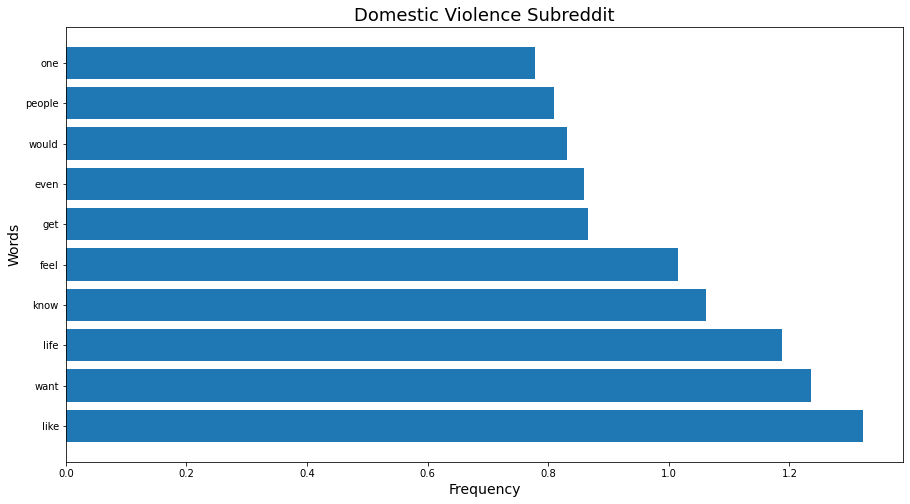

In [64]:
dom_coef = dom_words.mean().sort_values(ascending=False)[:10]

f, ax = plt.subplots(figsize=(15,8))
plt.barh(dom_coef.index, suicide_coef.values)
plt.title('Domestic Violence Subreddit', fontsize = 18)
plt.ylabel('Words', fontsize = 14)
plt.xlabel('Frequency', fontsize = 14);

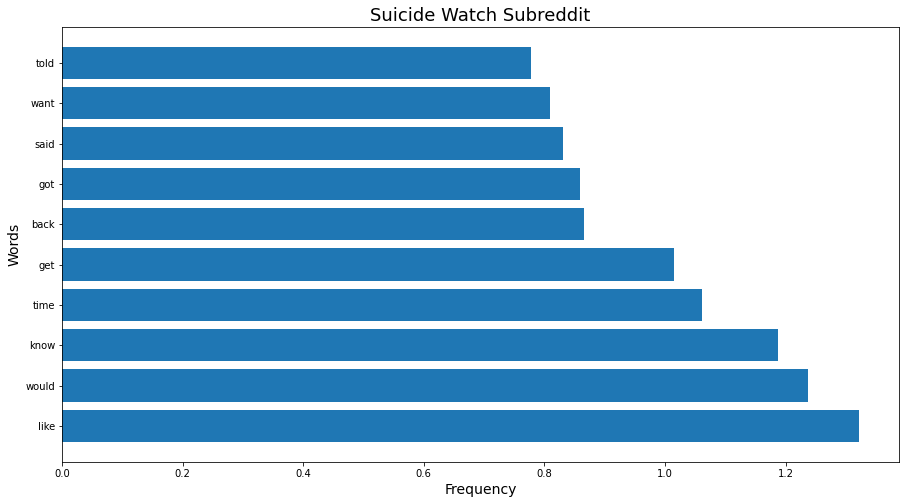

In [63]:
suicide_coef = suicide_words.mean().sort_values(ascending=False)[:10]

f, ax = plt.subplots(figsize=(15,8))
plt.barh(suicide_coef.index, suicide_coef.values)
plt.title('Suicide Watch Subreddit', fontsize = 18)
plt.ylabel('Words', fontsize = 14)
plt.xlabel('Frequency', fontsize = 14);

Both subreddit have **"Like"** as the most frequently used word. <br><br> One assumption could be, the 2 subreddit happens to be of sensitive topics whereby people could be consoling each other, people talking about their past negative experience.<br><br> If we look closely at the comments for 2 subreddits, we will find alot of selftext such as **"it makes me feel like...", "it just feels like..."** therefore concluding the possiblity that it will appear so often in both subreddit.   

### TFIDF Vectorization

In [46]:
#TVEC
tf_vectorizer = TfidfVectorizer(analyzer = "word", 
                             tokenizer = None, 
                             preprocessor = None,
                             stop_words = "english", 
                             max_features = 5000) 

# input for CountVectorizer is an array of strings
tf_vector_input = df['selftext']

# fit_transform the vectorizer
tf_words = tf_vectorizer.fit_transform(tf_vector_input)

# convert output to a Numpy array
tf_words = tf_words.toarray()

In [47]:
t_word_list = tf_vectorizer.get_feature_names()

In [48]:
tf_words = list(df.selftext)

In [49]:
tvec = TfidfVectorizer(analyzer='word', max_features=5000)
tv = tvec.fit_transform(tf_words)

In [50]:
tf_words = pd.DataFrame(tv.todense(), columns=tvec.get_feature_names())

In [51]:
tf_coef = tf_words.mean().sort_values(ascending=False)[:10]

In [52]:
print(tf_words.shape)
tf_words.head()

(1348, 5000)


,ab,aba,abandoned,abandoning,abandonment,abide,ability,able,abolition,abomination,...,youngest,youre,youth,youtu,youtube,yr,yrs,zero,zone,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.038407,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.065978,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


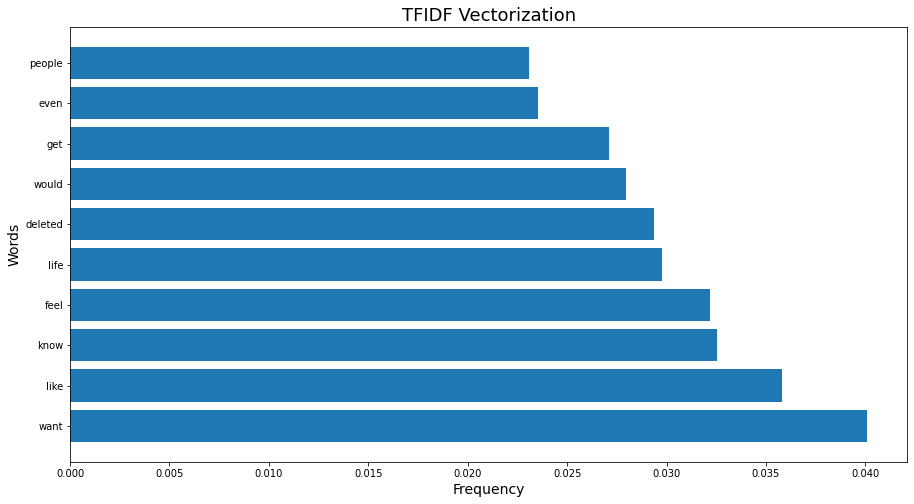

In [65]:
tf_coef = tf_words.mean().sort_values(ascending=False)[:10]

f, ax = plt.subplots(figsize=(15,8))
plt.barh(tf_coef.index, tf_coef.values)
plt.title('TFIDF Vectorization', fontsize = 18)
plt.ylabel('Words', fontsize = 14)
plt.xlabel('Frequency', fontsize = 14);

**TFIDF Vectorizer** weighted "want" higher than "like" compared to **Count Vectorizer**, when "like" appeared more times than "want" in suicide posts. Because TF-IDF "penalises" words that appearing too often. <br><br> These words might be a indicator to build models that might be able to predict and identify sucidal prone individuals.
    <hr>